## Tarea Académica 1

Integrantes:

1.   Piero Herrera Toranzo
2.   Diego Urrutia Ley



Objetivos:

1.   Descargar un *dataset* de imágenes.
2. Explicar brevemente los métodos SIFT, SURF y Daysi aplicados en imágenes.
2.   Usando *SIFT*, *SURF*, *Daysi* obtener los vectores característicos de cada imagen perteneciente al dataset.
3.   Usando *BoW* (*Bag of Words*), reducir cada archivo a un solo vector característico. Por lo tanto cada imagen tendrá 3 vectores característicos: 1 por BoW aplicado a *SIFT*, 1 por BoW aplicado a *SURF*, y 1 por BoW aplicado a *Daysi*.
4.   Crear 3 archivos globales, uno por cada descriptor, conteniendo todos los vectores *BoW* de cada imagen, a cada vector le debe acompañar una columna indicando la clase de la imagen.


# Dataset

El conjunto de imagenes es un dataset obtenido de Kaggle. El objetivo original de este dataset es el de entrenar un dispositivo integrado para realizar la detección de animales en tiempo real en las reservas naturales de Sudáfrica.
Link -> https://www.kaggle.com/biancaferreira/african-wildlife

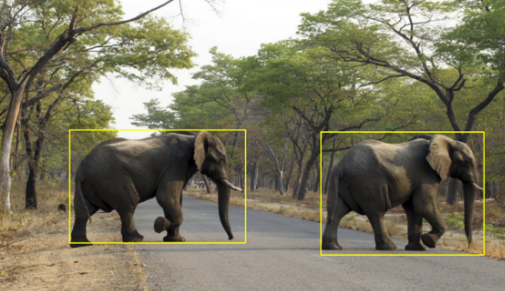

# Desarrollo con el método SIFT

Sift es un algoritmo que permite detectar y describir características locales en imágenes. Para ello se sigue una serie de pasos:
1. **Selección de picos de espacio de escala**: ubicación potencial para encontrar 
entidades.
2. **Localización de puntos clave** : localización precisa de los puntos clave de funciones.
3. **Asignación de orientación**: asignación de orientación a puntos clave.
4. **Descriptor de puntos clave** : describe los puntos clave como un vector.
5. **Coincidencia de puntos clave**


### Carga de bibliotecas



In [1]:
!pip uninstall opencv-python -y

!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

  Using cached https://files.pythonhosted.org/packages/61/29/fc60b2de1713aa92946992544329f20ccb5e4ba26290f403e04b7da44105/opencv_contrib_python-3.4.2.17-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/63/97/af8a92864a04bfa48f1b5c9b1f8bf2ccb2847f24530026f26dd223de4ca0/numpy-1.19.2-cp36-cp36m-manylinux2010_x86_64.whl
ERROR: imgaug 0.2.9 requires opencv-python, which is not installed.
ERROR: dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
ERROR: albumentations 0.1.12 requires opencv-python, which is not installed.
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.

In [2]:
import cv2
import numpy as np
import os

### Lectura del dataset (dentro del entorno colab)

In [3]:
train_path = 'Animales/Dataset'

training_names = os.listdir(train_path)

image_paths = []
#Etiquetas
image_classes = []

class_id = 0


def imglist(path):
    return [os.path.join(path,f) for f in os.listdir(path)]

#Lectura de las carpetas
for training_name in training_names:
    dir = os.path.join(train_path, training_name)
    class_path = imglist(dir)
    image_paths += class_path
    image_classes += [class_id]*len(class_path)
    class_id += 1

### Aplicación de SIFT

In [4]:
#Vector vacio de características (Todas las imágenes)
caractSIFT = []

for image_path in image_paths:
    im = cv2.imread(image_path)
    gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(gray,None)
    caractSIFT.append((image_path,des))


descriptors = caractSIFT[0][1]

for image_path, descriptor in caractSIFT[1:]:
    descriptors = np.vstack((descriptors, descriptor))

descriptors = descriptors.astype(float)


### Bag of words

In [5]:
#Kmeans

from scipy.cluster.vq import kmeans ,vq

k = 60
voc,variance = kmeans(descriptors,k,1)

im_features = np.zeros((len(image_paths),k), "float32")

for i in range(len(image_paths)):
    words, distance = vq(caractSIFT[i][1],voc)
    for w in words:
        im_features[i][w] += 1


### Agregar columna de clases y creación de Dataframe

In [19]:
Y = np.array(image_classes)

X = np.array(im_features)

import pandas as pd

Data = pd.DataFrame(X) 

#Inclusión de columna de clases
Data['60'] = Y


In [20]:
Data = Data.rename(columns = {'60':'Clase'})      

1. Cada columna indica una característica
2. Cada fila indica una imagen
3. La ultima columna indica la clase a la que pertenece la imagen



In [21]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,Clase
0,124.0,389.0,192.0,247.0,150.0,314.0,478.0,337.0,195.0,199.0,140.0,78.0,240.0,132.0,176.0,248.0,234.0,136.0,237.0,376.0,126.0,409.0,151.0,120.0,181.0,266.0,251.0,363.0,142.0,173.0,181.0,148.0,116.0,206.0,138.0,188.0,191.0,175.0,254.0,171.0,323.0,166.0,307.0,214.0,150.0,193.0,344.0,332.0,179.0,194.0,205.0,169.0,285.0,197.0,244.0,190.0,399.0,263.0,176.0,150.0,0
1,21.0,43.0,31.0,60.0,27.0,80.0,42.0,45.0,33.0,35.0,43.0,4.0,67.0,10.0,26.0,69.0,48.0,43.0,39.0,38.0,10.0,29.0,24.0,20.0,29.0,45.0,63.0,24.0,20.0,48.0,46.0,61.0,24.0,26.0,44.0,48.0,44.0,34.0,50.0,28.0,50.0,36.0,70.0,42.0,32.0,47.0,48.0,15.0,47.0,48.0,69.0,50.0,27.0,31.0,50.0,26.0,63.0,50.0,29.0,34.0,0
2,2.0,8.0,2.0,6.0,5.0,2.0,13.0,3.0,2.0,1.0,2.0,2.0,6.0,5.0,6.0,11.0,3.0,6.0,2.0,3.0,1.0,34.0,5.0,3.0,7.0,4.0,15.0,36.0,2.0,4.0,6.0,6.0,1.0,12.0,13.0,19.0,8.0,3.0,13.0,0.0,5.0,6.0,9.0,10.0,8.0,8.0,9.0,10.0,4.0,10.0,13.0,12.0,2.0,3.0,2.0,5.0,1.0,1.0,6.0,4.0,0
3,28.0,43.0,19.0,59.0,23.0,41.0,60.0,34.0,31.0,32.0,41.0,11.0,49.0,13.0,29.0,64.0,35.0,30.0,25.0,26.0,15.0,142.0,29.0,30.0,35.0,15.0,65.0,141.0,22.0,29.0,58.0,61.0,21.0,33.0,60.0,43.0,54.0,27.0,64.0,39.0,49.0,39.0,63.0,44.0,39.0,95.0,40.0,40.0,24.0,113.0,59.0,73.0,26.0,15.0,38.0,24.0,32.0,20.0,38.0,23.0,0
4,116.0,164.0,116.0,228.0,84.0,182.0,62.0,149.0,141.0,122.0,132.0,73.0,251.0,59.0,83.0,97.0,129.0,92.0,175.0,136.0,48.0,68.0,74.0,48.0,85.0,100.0,108.0,58.0,107.0,102.0,124.0,75.0,78.0,107.0,42.0,150.0,112.0,28.0,73.0,125.0,170.0,88.0,165.0,161.0,103.0,216.0,126.0,65.0,97.0,221.0,75.0,78.0,140.0,121.0,144.0,98.0,132.0,81.0,110.0,90.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,53.0,60.0,23.0,60.0,67.0,43.0,18.0,50.0,41.0,53.0,38.0,189.0,51.0,60.0,36.0,36.0,47.0,52.0,61.0,32.0,132.0,60.0,42.0,46.0,30.0,35.0,37.0,55.0,57.0,49.0,25.0,41.0,16.0,57.0,45.0,71.0,47.0,65.0,36.0,48.0,34.0,23.0,32.0,71.0,30.0,100.0,25.0,63.0,49.0,83.0,38.0,25.0,49.0,34.0,38.0,46.0,36.0,35.0,51.0,52.0,4
196,37.0,21.0,39.0,33.0,41.0,38.0,32.0,27.0,21.0,41.0,31.0,87.0,38.0,41.0,36.0,59.0,29.0,39.0,29.0,31.0,74.0,58.0,29.0,37.0,31.0,32.0,55.0,95.0,28.0,38.0,27.0,29.0,40.0,40.0,47.0,47.0,44.0,64.0,43.0,43.0,42.0,31.0,47.0,39.0,24.0,20.0,36.0,51.0,41.0,23.0,41.0,27.0,39.0,44.0,39.0,43.0,42.0,26.0,46.0,30.0,4
197,840.0,1032.0,672.0,703.0,1769.0,792.0,511.0,948.0,712.0,610.0,515.0,2463.0,734.0,1850.0,658.0,1924.0,688.0,962.0,825.0,416.0,2412.0,5336.0,762.0,2658.0,638.0,503.0,1781.0,4778.0,792.0,985.0,817.0,2534.0,533.0,1681.0,978.0,929.0,806.0,2061.0,2138.0,487.0,813.0,593.0,853.0,988.0,562.0,1203.0,434.0,2127.0,991.0,1203.0,2172.0,2090.0,701.0,489.0,671.0,695.0,416.0,504.0,677.0,713.0,4
198,16.0,10.0,13.0,14.0,20.0,7.0,12.0,14.0,11.0,13.0,5.0,81.0,13.0,30.0,7.0,8.0,13.0,11.0,18.0,8.0,85.0,9.0,5.0,9.0,6.0,4.0,8.0,12.0,14.0,10.0,6.0,2.0,6.0,12.0,9.0,16.0,3.0,14.0,3.0,14.0,8.0,10.0,7.0,21.0,8.0,8.0,5.0,7.0,13.0,3.0,4.0,13.0,25.0,16.0,10.0,12.0,11.0,5.0,22.0,9.0,4


In [18]:
Data.to_csv('SIFT.csv', header = True, index= True)